## Preparing the tools 

In [2]:
#import all the tools we need 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

#import model from sklearn 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#model Evaluations

from sklearn.model_selection import train_test_split ,cross_val_score 
from sklearn.model_selection import RandomizedSearchCV ,GridSearchCV 
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import precision_score ,f1_score ,recall_score
from sklearn.metrics import roc_auc_score


## Load Data

In [3]:
df = pd.read_csv("6.1 heart-disease.csv.csv")
df.shape

(303, 14)

## Data Exploration 

the goal here is to find more about the data and become a subject matter export on dataset you're working with .

In [4]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

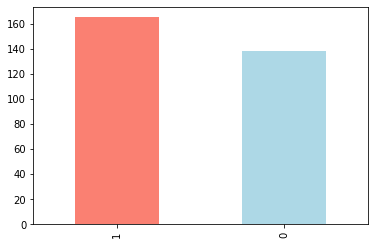

In [5]:
df['target'].value_counts().plot(kind='bar',color=['salmon','lightblue']);

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
#Are there any missing values ?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Find patterns between Sex and Target

In [9]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


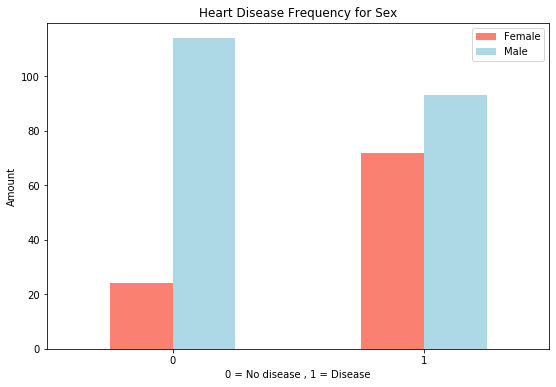

In [10]:
pd.crosstab(df.target,df.sex).plot(kind='bar',figsize=(9,6),color=['salmon','lightblue']);
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0 = No disease , 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female','Male'])
plt.xticks(rotation=0);

## Age vs Max Heart Rate for Heart Disease 

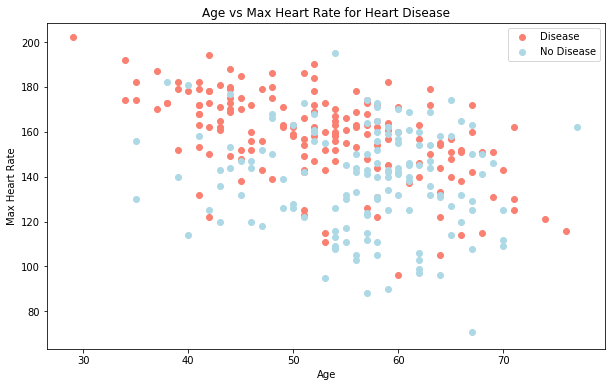

In [11]:
#Create A figure 
plt.figure(figsize=(10,6))

#scatter with positive examples 
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c='salmon')

#scatter with negative examplse 

plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c='lightblue')

#add some helpful info

plt.title('Age vs Max Heart Rate for Heart Disease')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease','No Disease']);

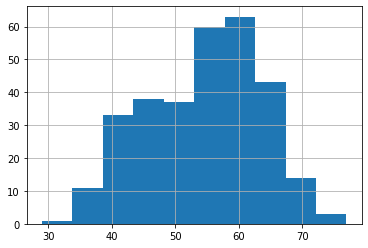

In [12]:
#check outlier          "clean "  بنشوف البيانات في كل عمود اذا تحتاج نعملها   
df.age.hist();

## Find patterns between CP(Chest pain) and Target

In [13]:
pd.crosstab(df.target,df.cp)

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


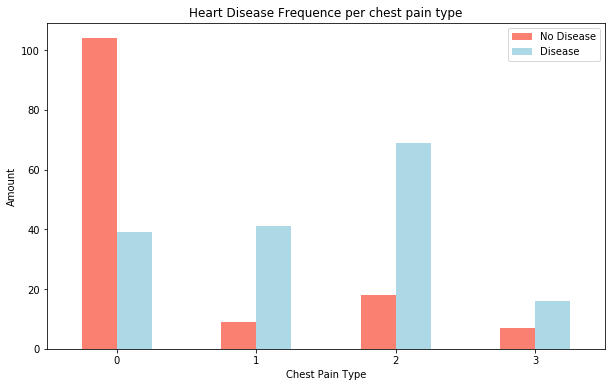

In [14]:
#make crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind='bar',figsize=(10,6),color=['salmon','lightblue'])

#add more info to bar 
plt.title('Heart Disease Frequence per chest pain type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['No Disease','Disease'])
plt.xticks(rotation=0);

In [15]:
#Make a correlation metrix 
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


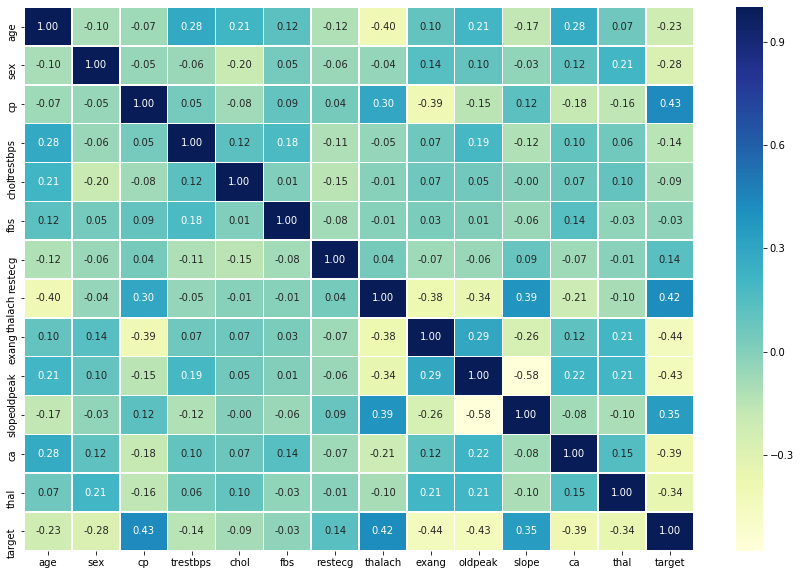

In [16]:
#make correlation  little prettier 
corr_matrix = df.corr()

fig,ax = plt.subplots(figsize=(15,10))
ax =sns.heatmap(corr_matrix,
                annot=True,
               linewidths=0.5,
               cmap='YlGnBu',
               fmt='0.2f')
bottom ,top =ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5);

## Modeling

In [17]:
X = df.drop('target',axis = 1)
y = df['target']

In [18]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [19]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [20]:
#split data into Train and test 

X_train ,X_test,y_train,y_test = train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  random_state=42)


In [21]:
X_train ,len(X_train)

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 132   42    1   1       120   295    0        1      162      0      0.0   
 202   58    1   0       150   270    0        0      111      1      0.8   
 196   46    1   2       150   231    0        1      147      0      3.6   
 75    55    0   1       135   250    0        0      161      0      1.4   
 176   60    1   0       117   230    1        1      160      1      1.4   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 188   50    1   2       140   233    0        1      163      0      0.6   
 71    51    1   2        94   227    0        1      154      1      0.0   
 106   69    1   3       160   234    1        0      131      0      0.1   
 270   46    1   0       120   249    0        0      144      0      0.8   
 102   63    0   1       140   195    0        1      179      0      0.0   
 
      slope  ca  thal  
 132      2   0     2  
 202      2   0     3  
 1

## Try 3 Different ML Models : 

1. Logistic Regrassion
2. K-Nearest Neighbours Classifier 
3. Random Forest Classifier



In [22]:
#put models in a Dictionary 

models = {'Logistic Regrassion': LogisticRegression(),
         'KNN':KNeighborsClassifier() , 
         'Random Forest ':RandomForestClassifier()}

#Create a Function to fit and score models 

def fit_and_score(models ,X_train,X_test,y_train,y_test):
    
    """
    Fit and Evaluate Models 
    Models : a dictionary of Sklearn ML Models 
    X_train :Trainning Data (No labels)
    X_test : Testing Data (No labels)
    y_train :Trainnin labels
    y_test :testing Labels
    """
    
    #set a rondom Seed 
    
    np.random.seed(42)
    
    #Make a dictionary to keep model score 
    
    models_score ={}
    
    #Loop Through Models 
    
    for name , model in models.items():
        
        #fit the model to the data 
        
        model.fit(X_train,y_train)
        
        #Evaluate the model and append to models_score 
        
        models_score[name]=model.score(X_test,y_test)
    
    return models_score
    

In [23]:
models_score = fit_and_score(models ,X_train,X_test,y_train,y_test)
models_score 

C:\Users\Mohamed Basher\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mohamed Basher\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'Logistic Regrassion': 0.8688524590163934,
 'KNN': 0.6885245901639344,
 'Random Forest ': 0.8524590163934426}

### Model Comparion 

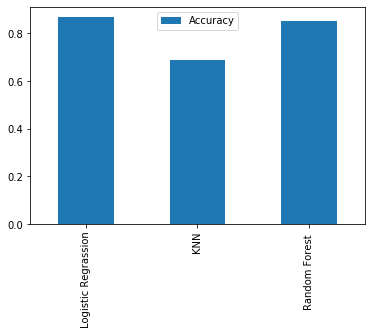

In [24]:
model_compare = pd.DataFrame(models_score,index=['Accuracy'])
model_compare.T.plot.bar();

 #### Let's look at the following :

* Hyprtprameter Tuning 
* Feature importance 
* confusion matrix 
* Cross validation 
* precision
* Recall 
* F1 Score 
* Classifcation report 
* ROC Curve 
* Area Under The curve (AUC)

### Hyperpramter Tuning with RandomizedSearchCV

We're going to tune :

* LogisticRegrassion()

* RandomForestClassifier()

..... using RandomizedSearchCV

In [25]:
#Creat a hyperprameter grid fot LogisticRegrassion 

log_reg_grid = {'C':np.logspace(-4,4,20),
               'solver':['liblinear']}
#Creat a hyperprameter grid fot RandomForestClassifier

rf_grid = {'n_estimators':np.arange(10,1000,50),
          'max_depth':[None ,3,5,10],
          'min_samples_split':np.arange(2,20,2),
          'min_samples_leaf':np.arange(1,20,2)}

Let's tuns them using RandomizedSearchCV

In [26]:
#Tune LogisticRegrassion 
#Setup Ranodm Seed
np.random.seed(42)

#setup random hyperparmter search for LG 

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

#Fit Random hyperpramter for LG 

rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished
C:\Users\Mohamed Basher\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=20, n_jobs=None,
                   param_distributi...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [27]:
#chack best params 
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [28]:
#chack score of the model 
rs_log_reg.score(X_test,y_test)

0.8852459016393442

So now we tune LogisticRegrassion() ,Let's do the same to RandomForsetClassifer()

In [29]:
#tune RandomForestClassifer 
#Setup Random Seed 
np.random.seed(42)

#setup random hyperparmeter for RandomForestClassifer 

rs_rfc = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           n_iter=20,
                           cv=5,
                           verbose=True)

#Fit random Hyperparmeter for RandomForestClassifer 

rs_rfc.fit(X_train,y_train)



Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished
C:\Users\Mohamed Basher\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [30]:
#What is the best prarms we found ?
rs_rfc.best_params_

{'n_estimators': 560,
 'min_samples_split': 12,
 'min_samples_leaf': 15,
 'max_depth': 3}

In [31]:
#Evaluate The RandomForestClassifer 
rs_rfc.score(X_test,y_test)

0.8688524590163934

## Hyperparamter Tuning with GridSearchCV 

Since our LogisticRegrassion Provide best score so far , We'll try and improve again using GridSearchCV

In [32]:
log_reg_grid = {'C':np.logspace(-4,4,30),
               'solver':['liblinear']}

gs_log_reg = GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,cv=5,verbose=True)


gs_log_reg.fit(X_train,y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.2s finished
C:\Users\Mohamed Basher\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [33]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [34]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

In [35]:
models_score

{'Logistic Regrassion': 0.8688524590163934,
 'KNN': 0.6885245901639344,
 'Random Forest ': 0.8524590163934426}

## Evaluate our ML classifier , beyond accuracy 

* ROC Curve and AUC Score 
* Confusion matrix 
* Classification report 
* precision 
* Recall 
* F1-score


In [36]:
#make predict with tuned model 

y_preds = gs_log_reg.predict(X_test)

In [37]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [38]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [40]:
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


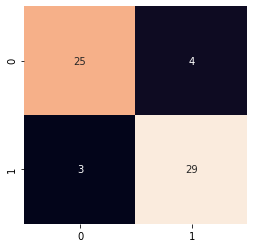

In [61]:
#plot Confusion matrix 

def plot_cm(y_test,y_preds):
    
    """
    plot Comfision matrix 
    
    """
    
    fig ,ax =plt.subplots(figsize=(4,4))
    
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True,
                     cbar=False)
    
    bottom ,top =ax.get_ylim()
    ax.set_ylim(bottom +0.5,top- 0.5)

    
plot_cm(y_test,y_preds)  

### Classification report

In [46]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### calculate evaluation metrics using cross-validation 

In [62]:
#check best hyperprameter 

gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [67]:
#creat a new classifier 

clf=LogisticRegression(C=0.20433597178569418,
                        solver='liblinear')


In [78]:
#cross-validtion accuracy   
cv_acc = cross_val_score(clf,X,y,scoring='accuracy',cv=5)
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [79]:
cv_acc =np.mean(cv_acc)
cv_acc

0.8446994535519124

In [80]:
#cross-validtion precision  
cv_pre = cross_val_score(clf,X,y,scoring='precision',cv=5)
cv_pre

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [81]:
cv_pre=np.mean(cv_pre)
cv_pre

0.8207936507936507

In [82]:
#cross-validtion recall    
cv_recall = cross_val_score(clf,X,y,scoring='recall',cv=5)
cv_recall

array([0.93939394, 0.93939394, 0.90909091, 0.93939394, 0.87878788])

In [83]:
cv_recall=np.mean(cv_recall)
cv_recall

0.9212121212121213

In [86]:
#cross-validtion f1-score  
cv_f1 = cross_val_score(clf,X,y,scoring='f1',cv=5)
cv_f1

array([0.84931507, 0.91176471, 0.88235294, 0.89855072, 0.79452055])

In [87]:
cv_f1=np.mean(cv_f1)
cv_f1

0.8673007976269721

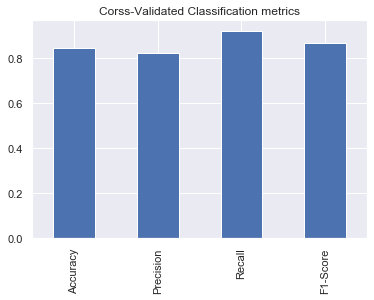

In [98]:
#Visulize Cross-Validated metrics 
cv_mertics =pd.DataFrame({"Accuracy":cv_acc,
                         'Precision':cv_pre,
                         'Recall':cv_recall,
                         'F1-Score':cv_f1},
                         index=[0])
cv_mertics.T.plot.bar(title='Corss-Validated Classification metrics',
                     legend=False);


### Feature Importance

for LogisticsRegrassion ... 

In [99]:
clf=LogisticRegression(C=0.20433597178569418,
                        solver='liblinear')


In [101]:
clf.fit(X_train,y_train);

In [102]:
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [105]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [104]:
#match coef's of feature to columns 

feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

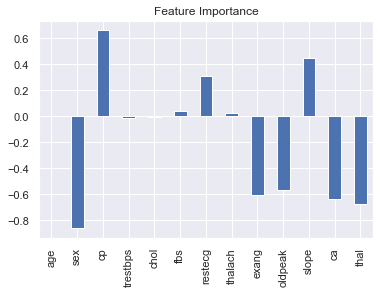

In [109]:
#visualize Feature importance 

feature_df = pd.DataFrame(feature_dict,index=[0])

feature_df.T.plot.bar(title='Feature Importance',legend=False) ;